<a href="https://colab.research.google.com/github/M-H-Amini/DeepLearningCourse/blob/master/TFSingleLayerMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name of ALLAH
**Written By Mohammad Hossein Amini**
# Single-Layer Network for Fashion MNIST Digits (Keras)
In this projects I'm gonna make a single-layer network for classifying Fashion MNIST dataset.


First of all, let's import modules...

In [22]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, InputLayer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2.0.0-rc0


# Loading Dataset
Let's load MNIST. This time I do it differently from the last project (From Scratch one).

In [57]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

label = {0: 'T-Shirt/Top',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandals',
          6: 'Shirt',
          7: 'Sneakers',
          8: 'Bag',
          9: 'Ankle Boot',
         }
print(x_train.shape, type(x_train))

(60000, 28, 28) <class 'numpy.ndarray'>


It's a good idea to see one of the elements of MNIST...

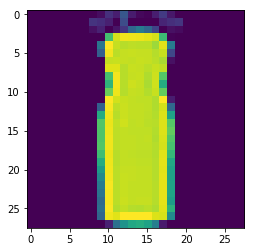

Label: Dress


In [64]:
index = np.random.randint(50000)
plt.imshow(x_train[index,:,:])
plt.show()
print('Label: {}'.format(label[np.argmax(y_train[index])]))

# Creating Model
I'm gonna make the model using Keras api...

In [65]:
linmodel = Sequential()

linmodel.add(InputLayer(input_shape=(28, 28)))
linmodel.add(Flatten())

linmodel.add(Dense(units=10, activation='softmax'))

linmodel.compile(loss='categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])
print(linmodel.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Let's train the model...

In [66]:
epochs = 10 # one epoch takes about 3 seconds
print(type(y_train), y_train.shape)
linhistory = linmodel.fit(x_train, y_train, 
                          epochs=epochs, 
                          batch_size=32,
                          verbose=2)

<class 'numpy.ndarray'> (60000, 10)
Train on 60000 samples
Epoch 1/10
60000/60000 - 3s - loss: 0.5977 - accuracy: 0.7983
Epoch 2/10
60000/60000 - 3s - loss: 0.4623 - accuracy: 0.8428
Epoch 3/10
60000/60000 - 3s - loss: 0.4358 - accuracy: 0.8498
Epoch 4/10
60000/60000 - 3s - loss: 0.4241 - accuracy: 0.8537
Epoch 5/10
60000/60000 - 3s - loss: 0.4126 - accuracy: 0.8580
Epoch 6/10
60000/60000 - 3s - loss: 0.4062 - accuracy: 0.8597
Epoch 7/10
60000/60000 - 3s - loss: 0.4021 - accuracy: 0.8619
Epoch 8/10
60000/60000 - 3s - loss: 0.3983 - accuracy: 0.8617
Epoch 9/10
60000/60000 - 3s - loss: 0.3947 - accuracy: 0.8626
Epoch 10/10
60000/60000 - 3s - loss: 0.3921 - accuracy: 0.8636


It's interesting to see the accuracy and the loss through epochs...

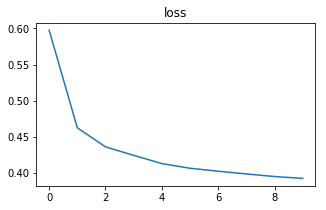

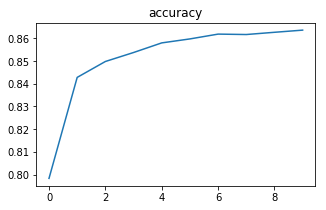

In [67]:
plt.figure(figsize=(5,3))
plt.plot(linhistory.epoch,linhistory.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(linhistory.epoch,linhistory.history['accuracy'])
plt.title('accuracy');

Let's test the model for some examples...

Test 1 out of 10...


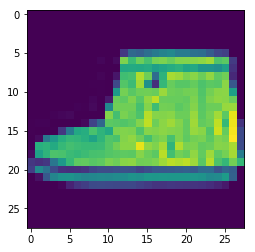

Actual:  Ankle Boot
Predicted:  Ankle Boot 

Test 2 out of 10...


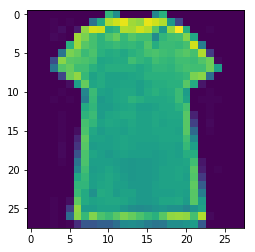

Actual:  T-Shirt/Top
Predicted:  T-Shirt/Top 

Test 3 out of 10...


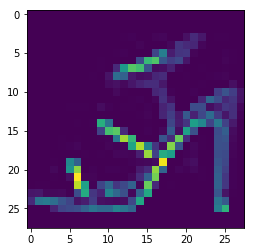

Actual:  Sandals
Predicted:  Sandals 

Test 4 out of 10...


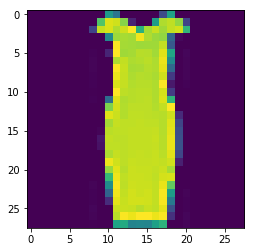

Actual:  Dress
Predicted:  Dress 

Test 5 out of 10...


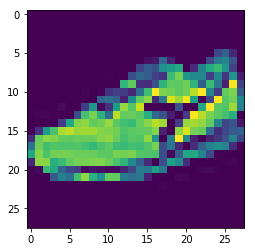

Actual:  Sneakers
Predicted:  Sandals 

Test 6 out of 10...


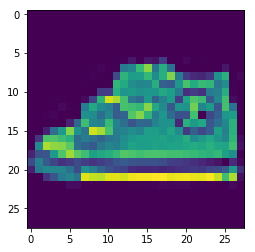

Actual:  Sneakers
Predicted:  Sandals 

Test 7 out of 10...


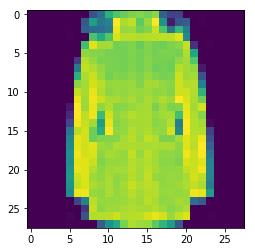

Actual:  Coat
Predicted:  Coat 

Test 8 out of 10...


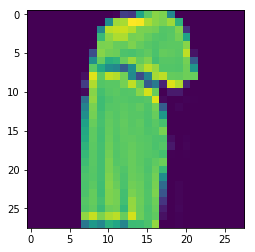

Actual:  Dress
Predicted:  Dress 

Test 9 out of 10...


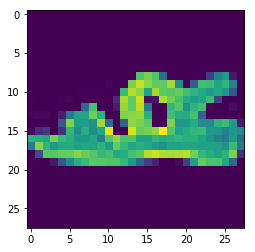

Actual:  Sandals
Predicted:  Sandals 

Test 10 out of 10...


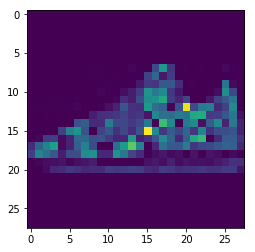

Actual:  Sneakers
Predicted:  Sneakers 



In [68]:
test_no = 10
indexes = [np.random.randint(0, 10000) for i in range(test_no)]
for i in range(test_no):
  print('Test {} out of {}...'.format(i+1, test_no))
  plt.imshow(x_test[indexes[i], :, :])
  plt.show()
  print('Actual: ', label[np.argmax(y_test[indexes[i]])])
  print('Predicted: ', label[np.argmax(linmodel.predict(x_test[indexes[i]: indexes[i]+1, :, :]))], '\n')

Finally, time for evaluating the trained model...

In [69]:
linscores = linmodel.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (linmodel.metrics_names[1], linscores[1]*100))

10000/1 - 0s - loss: 0.3976 - accuracy: 0.8397
accuracy: 83.97%
